In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Load data
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
# note: it is a Bunch object
# this basically acts like a ditionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
# 'data' means the input data of data
data.data.shape

# 569 samples with 30 features

(569, 30)

In [11]:
# targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
data.target.shape
# also have 569 targets

(569,)

In [14]:
# name of features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### train test split

In [17]:
from sklearn.model_selection import train_test_split

In [31]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                   test_size=0.33)

N, D = X_train.shape

In [27]:
# tensorflow
# using sigmoid for activation function (good performance with boolean type data)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
"""
Also can do like this

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))
"""

In [29]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [32]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 87.7780 - accuracy: 0.6273 - val_loss: 76.8211 - val_accuracy: 0.6277
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 75.2923 - accuracy: 0.6273 - val_loss: 64.9182 - val_accuracy: 0.6277
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 62.5429 - accuracy: 0.6273 - val_loss: 53.0994 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 50.3172 - accuracy: 0.6273 - val_loss: 41.0477 - val_accuracy: 0.6277
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 37.4562 - accuracy: 0.6273 - val_loss: 29.2480 - val_accuracy: 0.6277
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 24.9708 - accuracy: 0.6168 - val_loss: 17.4552 - val_accuracy: 0.6170
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 13.1121 - accuracy: 0.5459 - val_loss: 6.8101 - val_accuracy: 0.5213


12/12 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.8556 - val_loss: 0.4026 - val_accuracy: 0.8617
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8583 - val_loss: 0.3926 - val_accuracy: 0.8617
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8740 - val_loss: 0.3842 - val_accuracy: 0.8617
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8688 - val_loss: 0.3821 - val_accuracy: 0.8617
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8688 - val_loss: 0.3673 - val_accuracy: 0.8670
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8688 - val_loss: 0.3621 - val_accuracy: 0.8670
Epoch 64/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8793 - val_loss: 0.3555 - val_accuracy: 0.8777
Epoch 65/100
12/12 

In [33]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.8976
Train score: [0.2878226041793823, 0.8976377844810486]
6/6 [==============================] - 0s 878us/step - loss: 0.2364 - accuracy: 0.9149
Test score: [0.2363961637020111, 0.914893627166748]


### ploting

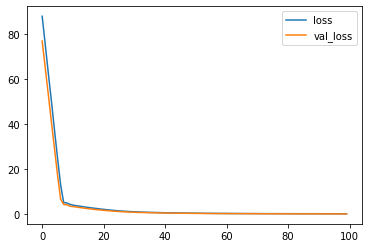

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

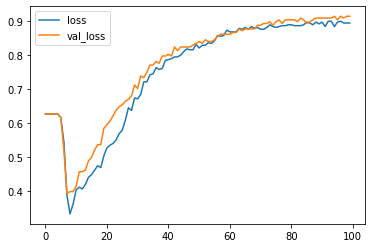

In [36]:
plt.plot(r.history['accuracy'], label='loss')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()